<a href="https://colab.research.google.com/github/avirooppal/Living-Object-Classification-Model/blob/main/CatAndDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:06<00:00, 308MB/s]
100% 1.06G/1.06G [00:06<00:00, 183MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

CNN Model goes here


In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 88ms/step - loss: 0.6144 - accuracy: 0.6561 - val_loss: 0.5063 - val_accuracy: 0.7506
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.4663 - accuracy: 0.7746 - val_loss: 0.4952 - val_accuracy: 0.7698
Epoch 3/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3603 - accuracy: 0.8386 - val_loss: 0.5084 - val_accuracy: 0.7770
Epoch 4/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2272 - accuracy: 0.9058 - val_loss: 0.6220 - val_accuracy: 0.7792
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1231 - accuracy: 0.9535 - val_loss: 0.8289 - val_accuracy: 0.7632
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0826 - accuracy: 0.9706 - val_loss: 1.0982 - val_accuracy: 0.7790
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0621 - accuracy: 0.9798 - val_loss: 1.0124 - val_accuracy:

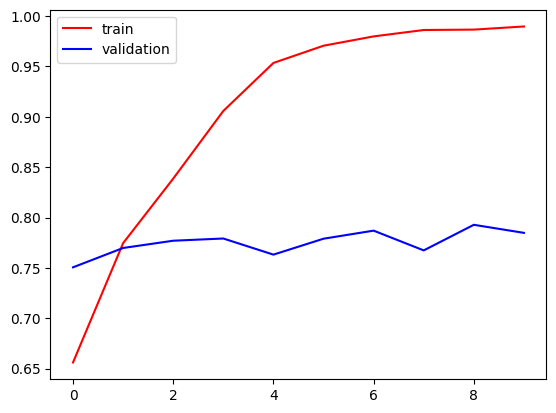

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

Picture Calling and Other's goes here

In [16]:
import cv2

In [17]:
test_img = cv2.imread('/content/dog.jpg')

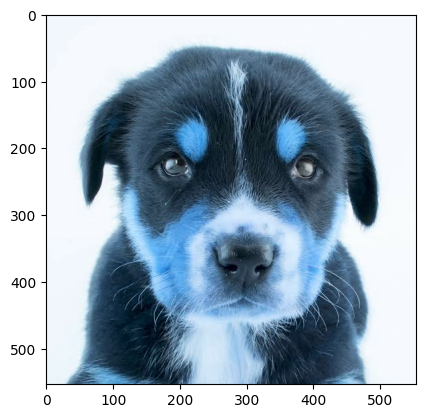

In [18]:
plt.imshow(test_img)

In [19]:
test_img.shape

(554, 554, 3)

In [20]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_input = test_img.reshape((1,256,256,3))

Prediction Goes here

In [24]:
model.predict(test_input)

1/1 [==============================] - 0s 237ms/step


array([[0.9998765]], dtype=float32)